**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [297]:
#Loading data
books_df = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books_df.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users_df = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users_df.columns = ['userID', 'Location', 'Age']

ratings_df = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings_df.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

### Check no.of records and features given in each dataset

In [298]:
print("Number of records & columns in Books dataset",books_df.shape)

Number of records & columns in Books dataset (271360, 8)


In [299]:
print("Number of records & columns in Users dataset",users_df.shape)

Number of records & columns in Users dataset (278858, 3)


In [300]:
print("Number of records & columns in Ratings dataset",ratings_df.shape)

Number of records & columns in Ratings dataset (1149780, 3)


## Exploring books dataset

In [301]:
books_df.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

In [302]:
books_df.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [303]:
books_df = books_df.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1)

In [304]:
books_df.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [305]:
books_df['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [306]:
books_df.loc[(books_df["yearOfPublication"] == "DK Publishing Inc"), :]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [307]:
books_df.loc[(books_df["yearOfPublication"] == "Gallimard"), :]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [308]:
books_df = books_df[books_df['yearOfPublication'] != "DK Publishing Inc"]

In [309]:
books_df = books_df[books_df['yearOfPublication'] != "Gallimard"]

In [310]:
books_df['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

### Change the datatype of yearOfPublication to 'int'

In [311]:
books_df['yearOfPublication']= books_df['yearOfPublication'].astype('int')

In [312]:
books_df.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [313]:
books_df['publisher'].isnull().sum()

2

There are 2 Nan values in the publisher column so we will drop them

In [314]:
books_df = books_df.dropna(axis = 0,subset=["publisher"])

In [315]:
books_df['publisher'].isnull().sum()

0

## Exploring Users dataset

In [316]:
print(users_df.shape)
users_df.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [317]:
print (sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [318]:
users_df.loc[(users_df.Age >90) | (users_df.Age <5), "Age"] = np.nan

### Replace null values in column `Age` with mean

In [319]:
users_df.Age = users_df.Age.fillna(users_df.Age.mean())

### Change the datatype of `Age` to `int`

In [320]:
users_df.Age = users_df.Age.astype("int")

In [321]:
print(sorted(users_df.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [322]:
ratings_df.shape

(1149780, 3)

In [323]:
n_users = users_df.shape[0]
n_books = books_df.shape[0]

In [324]:
ratings_df.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [325]:
ratings_df.count()

userID        1149780
ISBN          1149780
bookRating    1149780
dtype: int64

In [326]:
ratings_new = ratings_df[ratings_df.ISBN.isin(books_df.ISBN)]

In [327]:
ratings_new.count()

userID        1031130
ISBN          1031130
bookRating    1031130
dtype: int64

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [328]:
ratings_new = ratings_new[ratings_new.userID.isin(users_df.userID)]

In [329]:
ratings_new.count()

userID        1031130
ISBN          1031130
bookRating    1031130
dtype: int64

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [330]:
ratings_new = ratings_new[ratings_new.bookRating != 0]
ratings_new.head(10)

,userID,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9
19,276747,0671537458,9
20,276747,0679776818,8
21,276747,0943066433,7
23,276747,1885408226,7
24,276748,0747558167,6


In [331]:
ratings_new['bookRating'].unique()

array([ 5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

### Find out which rating has been given highest number of times

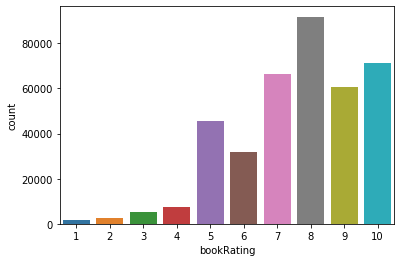

In [332]:
sns.countplot(data = ratings_new, x = 'bookRating' )
plt.show()

8 is the highest rating given highest number of times

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [333]:
userID_count = ratings_new["userID"].value_counts()
user_rated_hundred = ratings_new[ratings_new["userID"].isin(userID_count[userID_count >= 100].index)]
rating_count = ratings_new["bookRating"].value_counts()           
user_rated_hundred = user_rated_hundred[user_rated_hundred["bookRating"].isin(rating_count[rating_count >= 100].index)]
user_rated_hundred["userID"].value_counts() # only has users who have rated atleast 100 books

11676     6943
98391     5689
189835    1899
153662    1845
23902     1180
235105    1020
76499     1012
171118     962
16795      959
248718     941
56399      837
197659     781
35859      777
185233     698
95359      606
114368     603
158295     567
101851     563
177458     524
204864     504
93047      501
69078      499
182085     498
135149     487
100906     484
107784     482
78973      479
23872      478
60244      476
257204     475
          ... 
113270     104
164096     104
163804     104
183958     104
250405     104
35836      104
164323     103
2110       103
132492     103
235935     102
193898     102
76223      102
148966     102
10560      102
86189      102
117384     101
172888     101
66942      101
146113     101
224525     101
109901     101
33145      100
26544      100
169682     100
36609      100
211919     100
208406     100
36299      100
156300     100
95010      100
Name: userID, Length: 449, dtype: int64

In [334]:
user_rated_hundred.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9


### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [335]:
user_rated_hundred.isnull().sum()

userID        0
ISBN          0
bookRating    0
dtype: int64

no Nan Values are there in this dataframe

In [336]:
R_df = user_rated_hundred.pivot(index = 'userID', columns ='ISBN', values = 'bookRating').fillna(0)

### Generate the predicted ratings using SVD with no.of singular values to be 50

In [337]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_df, k = 50)

In [338]:
#diag
sigma = np.diag(sigma)

In [339]:
#I also need to add the user means back to get the predicted 5-star ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)

In [340]:

preds_df

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
0,0.025341,-0.002146,-1.430820e-03,-0.002146,-0.002146,0.002971,-0.003920,0.007035,0.007035,0.012316,...,0.000180,0.000226,0.042081,-0.016804,-0.080028,0.004746,0.028314,0.000120,-0.001693,0.067503
1,-0.010012,-0.003669,-2.446297e-03,-0.003669,-0.003669,0.001075,0.001440,-0.003500,-0.003500,0.001612,...,-0.000363,0.000403,0.008142,0.001104,-0.029224,0.000999,0.002363,-0.000242,0.000029,-0.013059
2,-0.015054,-0.015457,-1.030440e-02,-0.015457,-0.015457,0.007281,-0.014033,0.011941,0.011941,0.011796,...,-0.000455,0.001907,0.047982,0.005737,0.117859,0.006945,0.003119,-0.000304,0.009009,-0.057692
3,-0.021499,0.035602,2.373467e-02,0.035602,0.035602,0.030307,0.024215,-0.001053,-0.001053,0.067579,...,0.002971,0.009912,0.086248,-0.008818,0.016154,0.028848,-0.000125,0.001981,0.031201,-0.046664
4,0.002077,-0.007965,-5.310012e-03,-0.007965,-0.007965,0.002947,0.003057,0.000231,0.000231,0.006080,...,0.002120,0.001597,-0.012181,0.009420,0.673459,0.002591,-0.008229,0.001413,0.004918,0.047773
5,-0.002046,0.018614,1.240949e-02,0.018614,0.018614,0.007966,0.022983,-0.005167,-0.005167,0.018298,...,0.002278,0.003343,0.029729,-0.013429,-0.069757,0.008082,0.003330,0.001519,0.008519,0.072081
6,-0.015920,0.020221,1.348068e-02,0.020221,0.020221,0.014194,0.016776,-0.002339,-0.002339,0.031493,...,0.002596,0.003667,0.030025,0.012455,0.030068,0.013586,0.001308,0.001731,0.014216,-0.004550
7,-0.010875,-0.010051,-6.700652e-03,-0.010051,-0.010051,0.023373,-0.014173,0.017087,0.017087,0.057111,...,0.000141,0.006781,0.121680,-0.000650,-0.319179,0.018844,0.045594,0.000094,0.014902,0.012477
8,0.040930,-0.030352,-2.023461e-02,-0.030352,-0.030352,0.018473,-0.031587,-0.013278,-0.013278,0.037860,...,0.002069,0.005255,0.070450,0.007803,-0.077213,0.014357,0.005920,0.001380,0.016526,-0.027260
9,0.023473,-0.004168,-2.778375e-03,-0.004168,-0.004168,0.054426,-0.015698,-0.011736,-0.011736,0.114924,...,0.006618,0.012665,0.172246,-0.010902,-0.175556,0.049872,0.012847,0.004412,0.051858,-0.023768


### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [341]:
userID = 2110

In [342]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

In [343]:

# return the books with the highest predicted rating that the specified user hasn’t already rated
#Take specific user row from matrix from predictions
def recommend_books(predictions_df, user_id,userID, books_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = user_id - 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.userID == (userID)]
    #Added title and genres
    user_full = (user_data.merge(books_df, how = 'left', left_on = 'ISBN', right_on = 'ISBN').
                     sort_values(['bookRating'], ascending=False)
                 )

    print ('User {0} has already rated {1} books.'.format(userID, user_full.shape[0]))
   ## print ('Recommending the highest {0} predicted ratings books not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating books that the user hasn't seen yet.
    recommendations = (books_df[~books_df['ISBN'].isin(user_full['ISBN'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'ISBN',
               right_on = 'ISBN').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations, sorted_user_predictions, user_data, user_full

already_rated, predictions, sorted_user_predictions, user_data, user_full = recommend_books(preds_df,user_id,userID, books, user_rated_hundred, 10)

User 2110 has already rated 103 books.


### Get the predicted ratings for userID `2110` and sort them in descending order

In [344]:
sorted_user_predictions

ISBN
059035342X    0.682444
0345370775    0.368946
0345384911    0.333624
043935806X    0.333209
044021145X    0.329336
0451151259    0.313295
0439139597    0.305088
0439064872    0.290587
0380759497    0.278563
0345353145    0.250941
0451167317    0.249254
0439136369    0.242676
0618002235    0.239957
0880389117    0.239552
0618002227    0.239242
0451160525    0.234959
0446310786    0.231819
0451173317    0.229402
0440213525    0.228038
0060392452    0.227935
0439136350    0.226968
0345335287    0.223613
1560768304    0.221496
0441845630    0.221496
0451156609    0.221396
0451180232    0.221054
0345317580    0.219552
0451142934    0.218949
0312980140    0.218348
0670835382    0.216858
                ...   
0553576925   -0.042664
0688088686   -0.043207
0786000899   -0.043301
0553567683   -0.043553
042518630X   -0.043825
0671673661   -0.044025
0345361571   -0.044076
042517770X   -0.044668
0446603090   -0.044738
0684195984   -0.047424
0684195976   -0.047690
0679405283   -0.047838
055380

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [345]:
user_data

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5
14455,2110,015216250X,8
14457,2110,0345260627,10
14458,2110,0345283554,10
14459,2110,0345283929,10
14460,2110,034528710X,10


In [346]:
user_data.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [347]:
user_data.shape

(103, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [348]:
user_full

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
76,2110,067166865X,10,STAR TREK YESTERDAY'S SON (Star Trek: The Orig...,A.C. Crispin,1988,Audioworks,http://images.amazon.com/images/P/067166865X.0...,http://images.amazon.com/images/P/067166865X.0...,http://images.amazon.com/images/P/067166865X.0...
52,2110,0590109715,10,"The Andalite Chronicles (Elfangor's Journey, A...",Katherine Applegate,1997,Apple,http://images.amazon.com/images/P/0590109715.0...,http://images.amazon.com/images/P/0590109715.0...,http://images.amazon.com/images/P/0590109715.0...
64,2110,0590629786,10,"The Visitor (Animorphs, No 2)",K. A. Applegate,1996,Scholastic,http://images.amazon.com/images/P/0590629786.0...,http://images.amazon.com/images/P/0590629786.0...,http://images.amazon.com/images/P/0590629786.0...
63,2110,0590629778,10,"The Invasion (Animorphs, No 1)",K. A. Applegate,1996,Scholastic,http://images.amazon.com/images/P/0590629778.0...,http://images.amazon.com/images/P/0590629778.0...,http://images.amazon.com/images/P/0590629778.0...
61,2110,059046678X,10,The Yearbook,Peter Lerangis,1994,Scholastic,http://images.amazon.com/images/P/059046678X.0...,http://images.amazon.com/images/P/059046678X.0...,http://images.amazon.com/images/P/059046678X.0...
55,2110,059035342X,10,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
93,2110,0812505042,10,The Time Machine,H. G. Wells,1995,Tor Books,http://images.amazon.com/images/P/0812505042.0...,http://images.amazon.com/images/P/0812505042.0...,http://images.amazon.com/images/P/0812505042.0...
54,2110,0590213040,10,The Andalite's Gift (Animorphs : Megamorphs 1),K. A. Applegate,1997,Scholastic,http://images.amazon.com/images/P/0590213040.0...,http://images.amazon.com/images/P/0590213040.0...,http://images.amazon.com/images/P/0590213040.0...
53,2110,0590109960,10,Watchers #1: Last Stop,Peter Lerangis,1998,Scholastic,http://images.amazon.com/images/P/0590109960.0...,http://images.amazon.com/images/P/0590109960.0...,http://images.amazon.com/images/P/0590109960.0...
82,2110,0679805265,10,Long Shot (Three Investigators Crimebusters (P...,Megan Stine,1993,Random House Children's Books,http://images.amazon.com/images/P/0679805265.0...,http://images.amazon.com/images/P/0679805265.0...,http://images.amazon.com/images/P/0679805265.0...


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [349]:
predictions

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
1192,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books,http://images.amazon.com/images/P/0345370775.0...,http://images.amazon.com/images/P/0345370775.0...,http://images.amazon.com/images/P/0345370775.0...
6184,0345384911,Crystal Line,Anne McCaffrey,1993,Del Rey Books,http://images.amazon.com/images/P/0345384911.0...,http://images.amazon.com/images/P/0345384911.0...,http://images.amazon.com/images/P/0345384911.0...
5458,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
455,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group,http://images.amazon.com/images/P/044021145X.0...,http://images.amazon.com/images/P/044021145X.0...,http://images.amazon.com/images/P/044021145X.0...
2031,0451151259,Eyes of the Dragon,Stephen King,1988,Penguin Putnam~mass,http://images.amazon.com/images/P/0451151259.0...,http://images.amazon.com/images/P/0451151259.0...,http://images.amazon.com/images/P/0451151259.0...
5383,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
3413,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
976,0380759497,Xanth 15: The Color of Her Panties,Piers Anthony,1992,Eos,http://images.amazon.com/images/P/0380759497.0...,http://images.amazon.com/images/P/0380759497.0...,http://images.amazon.com/images/P/0380759497.0...
2435,0345353145,Sphere,MICHAEL CRICHTON,1988,Ballantine Books,http://images.amazon.com/images/P/0345353145.0...,http://images.amazon.com/images/P/0345353145.0...,http://images.amazon.com/images/P/0345353145.0...
6048,0451167317,The Dark Half,Stephen King,1994,Signet Book,http://images.amazon.com/images/P/0451167317.0...,http://images.amazon.com/images/P/0451167317.0...,http://images.amazon.com/images/P/0451167317.0...
